# Loading the Data and Importing of required modules for data manipulation

In [1]:
# Importing required modules 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the data set to 
titanic_train_data =pd.read_csv('./data/train.csv')
titanic_test_data =pd.read_csv('./data/test.csv')

In [3]:
titanic_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
titanic_train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Preparation

Handling Missing Values in the Dataset

In [6]:
# Checking for null values in the dataset
titanic_train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#  Handling Missing value in Numerical data

In [7]:

#Fill the null  value in Age column with the mean of the Age 
titanic_train_data.Age =titanic_train_data.Age.fillna(titanic_train_data['Age'].mean())
titanic_test_data.Age =titanic_test_data.Age.fillna(titanic_test_data['Age'].mean())

titanic_train_data.Age.isnull().count()



891

# Handling Missing values in Categorical data

In [8]:
# Handling Missing values in Categorical data
titanic_train_data[['Cabin', 'Embarked']].isnull().sum()


Cabin       687
Embarked      2
dtype: int64

In [9]:
# Fill the Embarked column with previous observerd value(fillf)
titanic_train_data['Embarked'] = titanic_train_data['Embarked'].fillna(method='ffill')
titanic_train_data['Embarked'].isnull().sum()

titanic_test_data['Embarked'] = titanic_test_data['Embarked'].fillna(method='ffill')
titanic_test_data['Embarked'].isnull().sum()

titanic_test_data['Fare'] = titanic_test_data['Fare'].fillna(method='ffill')
titanic_test_data['Fare'].isnull().sum()




0

In [10]:
# Filling the Cabin missing value with  Value most frequently value
# df['Embarked'].fillna(df['Embarked'].value_counts().index[0])
print(titanic_train_data.Cabin.isnull().count())
print(titanic_train_data.Cabin.notnull().sum())

891
204


In [11]:
# Since the Cabin Missing data is More than half of the data we are replacing that missing vslue with "Unknown" value
titanic_train_data['Cabin'] = titanic_train_data['Cabin'].fillna('Unknown')

In [12]:
titanic_train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Data Visualization

In [13]:
titanic_train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Unknown,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Unknown,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


<AxesSubplot:title={'center':'Age of passengers'}, xlabel='Age', ylabel='Count'>

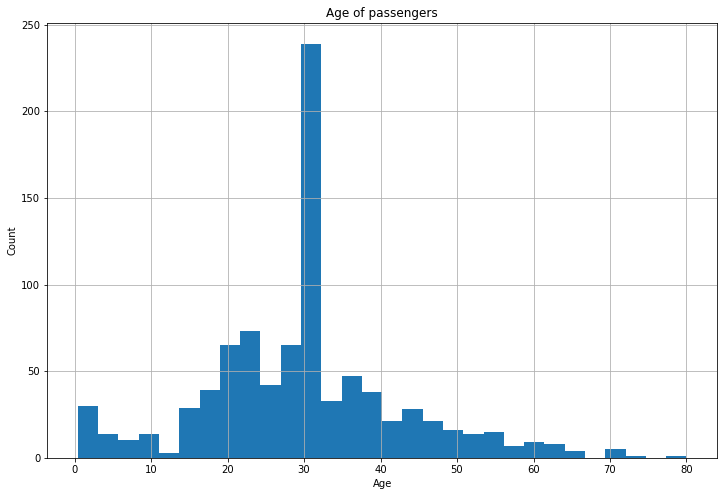

In [14]:
plt.figure(figsize=(12,8))
plt.title('Age of passengers')
plt.xlabel('Age')
plt.ylabel('Count')
titanic_train_data['Age'].hist(bins=30)

In [15]:
#Function that take two values and draws a pivot bar graph showing the relatioship within the dataset
def make_pivot (value1, value2):
    titanic_train_data_slice = titanic_train_data[[value1, value2, 'PassengerId']]
    slice_pivot = titanic_train_data_slice.pivot_table(index=[value1], columns=[value2],aggfunc=np.size, fill_value=0)
#     Split the survived number of passenger survived with their respective to function call when creating the pivot bar graph
    
    p_chart = slice_pivot.plot.bar()
    for p in p_chart.patches:
        p_chart.annotate(str(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.01))
    
    return slice_pivot
    return p_chart


PassengerId     
Sex           female male
Survived                 
0                 81  468
1                233  109

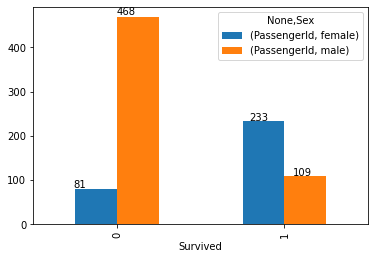

In [16]:
#Pivot graph showing the relatioship of surviver and their sex
make_pivot('Survived','Sex')

PassengerId         
Pclass             1   2    3
Survived                     
0                 80  97  372
1                136  87  119

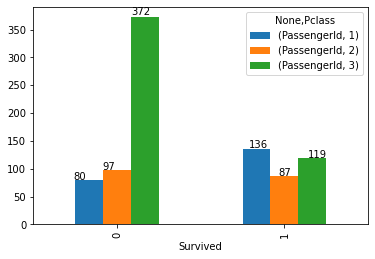

In [17]:
# Relationship between the surviver and their booking class
make_pivot('Survived', 'Pclass')


PassengerId   
Survived              0  1
Ticket                    
110152                0  3
110413                1  2
110465                2  0
110564                0  1
110813                0  1
...                 ... ..
W./C. 6608            4  0
W./C. 6609            1  0
W.E.P. 5734           1  0
W/C 14208             1  0
WE/P 5735             1  1

[681 rows x 2 columns]

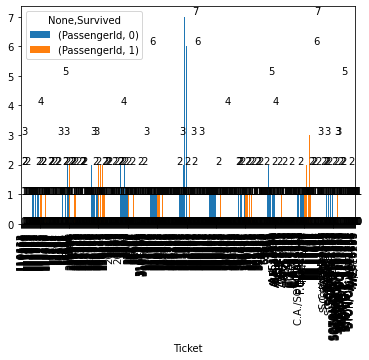

In [18]:
make_pivot( 'Ticket','Survived')

PassengerId         
Embarked           C   Q    S
Survived                     
0                 75  47  427
1                 94  31  217

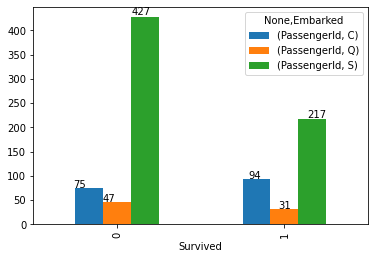

In [19]:
# Relationship between the surviver and the place of Embarked
make_pivot('Survived','Embarked')

PassengerId       
Embarked           C  Q   S
Fare                       
0.0000             0  0  15
4.0125             1  0   0
5.0000             0  0   1
6.2375             0  0   1
6.4375             1  0   0
...              ... ..  ..
227.5250           4  0   0
247.5208           2  0   0
262.3750           2  0   0
263.0000           0  0   4
512.3292           3  0   0

[248 rows x 3 columns]

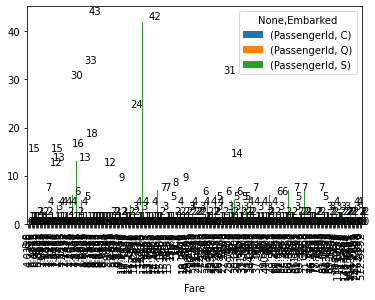

In [20]:
# Relationship between the Fare charged and the Place of Embarked
make_pivot('Fare', 'Embarked')


PassengerId         
Embarked           C   Q    S
Pclass                       
1                 86   3  127
2                 17   3  164
3                 66  72  353

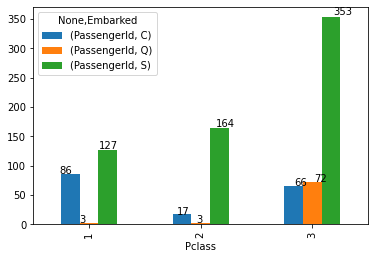

In [21]:
# Relationship between the Passanger class and the Embarked
make_pivot('Pclass', 'Embarked')

PassengerId     
Sex         female male
Pclass                 
1               94  122
2               76  108
3              144  347

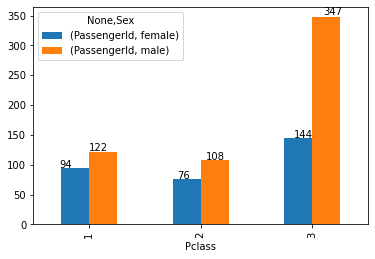

In [22]:
# Relationship between the  Passenger class and their sex 
make_pivot('Pclass', 'Sex')

Text(0.5, 0, '')

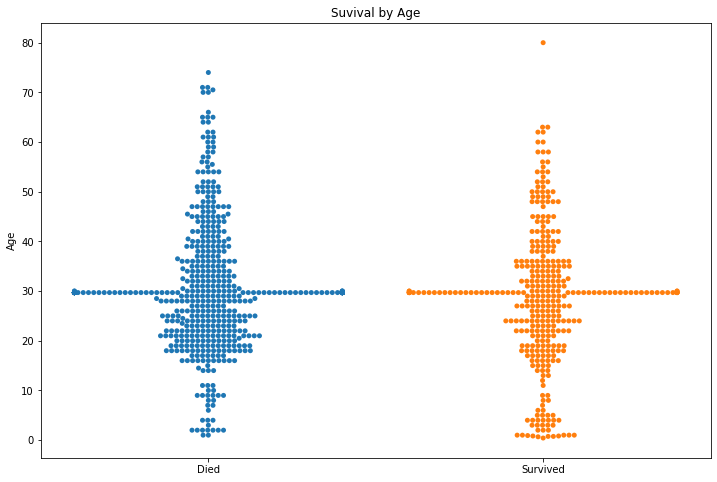

In [23]:
ax = plt.figure(figsize=(12,8))
ax = sns.swarmplot(x='Survived',y='Age',data=titanic_train_data)
ax.set_title('Suvival by Age')
ax.set_xticklabels(['Died','Survived'])
ax.set_xlabel('')

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

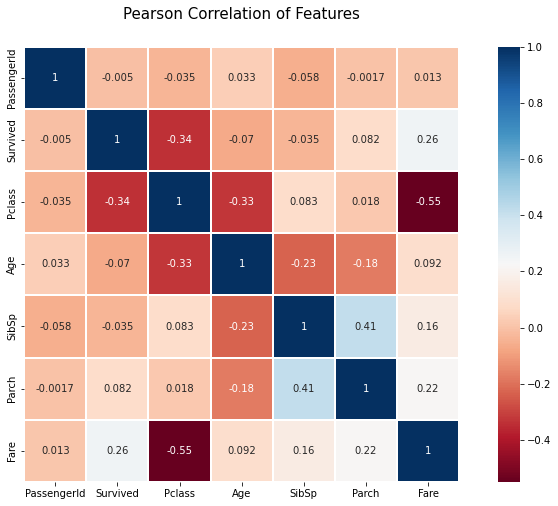

In [24]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,8))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(titanic_train_data.corr(),linewidths=0.1,vmax=1.0, 
            square=True,linecolor='white',cmap=colormap, annot=True)

# Model Development

In [25]:
# Importing of Machine learning models
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error 
from sklearn.neural_network import MLPClassifier


In [26]:
titanic_train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [27]:
df1 = titanic_train_data.copy()

In [28]:
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit_transform(df1['Embarked'])


array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2,
       1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1,
       2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0,
       2, 2, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1,

In [30]:
df1['Embarked_le'] = le.fit_transform(df1['Embarked'])
df1['Embarked'].value_counts()


S    644
C    169
Q     78
Name: Embarked, dtype: int64

In [31]:
le.fit_transform(df1['Sex'])

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

In [32]:
le.fit_transform(df1['Ticket'])

array([523, 596, 669,  49, 472, 275,  85, 395, 344, 132, 616,  38, 535,
       333, 413, 153, 480, 151, 301, 184, 139, 152, 278,  42, 395, 329,
       179,  95, 283, 362, 598, 586, 288, 549, 600,  43, 202, 514, 302,
       186, 507,  53, 391, 634, 282, 617, 462,  76, 190, 377, 249, 522,
       587, 239,  29,  94, 555, 215, 561, 566, 197,  32, 457, 337, 601,
       189, 553, 623, 248, 270, 557, 566, 621, 204,  80, 347, 355, 473,
       158, 432, 304, 311, 280,  25, 637, 247, 676, 652,  95, 297, 298,
       341, 678, 548, 428, 475, 607, 612, 117, 150, 384, 361, 417, 505,
       245, 354, 296, 254, 388, 469,   2, 193, 274, 491, 176, 666, 460,
        53, 585, 333, 621, 540, 132, 219, 417, 186, 463, 541, 196, 318,
       380, 640, 537, 111, 552, 630,  55,  49, 504, 592, 203, 332, 668,
       438, 118, 558, 405, 676, 113, 147, 622,  36, 516, 538, 573, 595,
       418, 654, 258, 568, 470, 559, 323, 265, 249, 423,  28, 337, 576,
        80,   5, 480, 344, 659,  90, 412, 488, 593, 169, 574, 56

In [33]:
df1['Ticket_type'] = le.fit_transform(df1['Ticket'])

In [34]:
df1['Sex_le'] = le.fit_transform(df1['Sex'])
df1['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [35]:
df1[['Pclass','Sex_le', 'Embarked_le', 'Ticket_type', 'Cabin', 'Fare']]

,Pclass,Sex_le,Embarked_le,Ticket_type,Cabin,Fare
0,3,1,2,523,Unknown,7.2500
1,1,0,0,596,C85,71.2833
2,3,0,2,669,Unknown,7.9250
3,1,0,2,49,C123,53.1000
4,3,1,2,472,Unknown,8.0500
...,...,...,...,...,...,...
886,2,1,2,101,Unknown,13.0000
887,1,0,2,14,B42,30.0000
888,3,0,2,675,Unknown,23.4500
889,1,1,0,8,C148,30.0000


In [36]:
fetures = ['Pclass', 'Sex_le', 'Age', 'Embarked_le','SibSp', 'Fare', 'Parch']
X = df1[fetures]


In [37]:
X.describe()


,Pclass,Sex_le,Age,Embarked_le,SibSp,Fare,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.647587,29.699118,1.533109,0.523008,32.204208,0.381594
std,0.836071,0.477990,13.002015,0.793069,1.102743,49.693429,0.806057
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,1.000000,0.000000,7.910400,0.000000
50%,3.000000,1.000000,29.699118,2.000000,0.000000,14.454200,0.000000
75%,3.000000,1.000000,35.000000,2.000000,1.000000,31.000000,0.000000
max,3.000000,1.000000,80.000000,2.000000,8.000000,512.329200,6.000000


In [38]:
y = df1.Survived
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [39]:
X_train = df1[fetures]


In [40]:
X_train

,Pclass,Sex_le,Age,Embarked_le,SibSp,Fare,Parch
0,3,1,22.000000,2,1,7.2500,0
1,1,0,38.000000,0,1,71.2833,0
2,3,0,26.000000,2,0,7.9250,0
3,1,0,35.000000,2,1,53.1000,0
4,3,1,35.000000,2,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,1,27.000000,2,0,13.0000,0
887,1,0,19.000000,2,0,30.0000,0
888,3,0,29.699118,2,1,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [41]:
X_train.shape

(891, 7)

In [42]:
# Split into validation and training data
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=1)

# Defing the model
titanic_model = RandomForestClassifier()



# Fit the model
titanic_model.fit(X_train, y_train)


# Make validation predictions and calculate mean absolute error
val_predictions = titanic_model.predict(X_val)
val_mae = mean_absolute_error(val_predictions, y_val)
acc_random_forest = round(titanic_model.score( X_train, y_train) * 100, 2)

In [43]:
# print("Validation MAE for Random Forest Model: {:,.0f}".format(val_mae))
print(round(acc_random_forest,2,), "%")


98.95 %


In [44]:
titanic_test_data['Embarked_le'] = le.fit_transform(titanic_test_data['Embarked'])
# titanic_test_data['Ticket_type'] = le.fit_transform(titanic_test_data['Ticket'])
titanic_test_data['Sex_le'] = le.fit_transform(titanic_test_data['Sex'])

titanic_test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_le,Ticket_type,Sex_le
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,Q,1,152,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,S,2,221,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,Q,1,73,1
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,S,2,147,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,S,2,138,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,S,2,267,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C,0,324,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,2,346,1
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,S,2,220,1


In [45]:
test_X = fetures
test_X = titanic_test_data[fetures]
test_X.isnull().sum()

Pclass         0
Sex_le         0
Age            0
Embarked_le    0
SibSp          0
Fare           0
Parch          0
dtype: int64

In [46]:
# titanic_model_on_full_data = RandomForestClassifier(random_state=1)
titanic_model_on_full_data = MLPClassifier(random_state=0)
titanic_model_on_full_data.fit(X, y)

MLPClassifier(random_state=0)

In [47]:
# make predictions which we will submit. 
test_preds = titanic_model_on_full_data.predict(test_X)

In [48]:
Mlp_submission2 = pd.DataFrame({'PassengerId':titanic_test_data['PassengerId'],'Survived':test_preds})
Mlp_submission2.to_csv('Mlp_submission2.csv',index=False)
Mlp_submission2.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# Random 

In [49]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train) 
Y_pred = decision_tree.predict(test_X) 
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

In [50]:
acc_decision_tree

98.95

In [51]:
# param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
# from sklearn.model_selection import GridSearchCV, cross_val_score
# rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
# clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
# clf.fit(X_train, y_train)
# clf.bestparams